# Projeto 2 - Ciência dos Dados

Grupo: Guilherme Ricchetti Carvalho, Keiya Nishio, Lucas Gabriel Mocellin Teixeira e Matheus Marques Venturi.


Turma: C

### Importando bibliotecas

In [118]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Introdução

A intoxicação por cogumelos é um problema crescente na sociedade. A diversidade de cogumelos é um dos obstáculos para o controle desse fonômeno. Por isso, esse projeto visa construir um classificador de cogumelos com base em diversas características morfológicas e ecológicas. Acredita-se que, além do aprendizado dos conceitos básicos de machine learning e estatística, esse projeto sirva como um auxílio ao ferramental epidemiológico, contribuindo para o controle de doenças causadas por cogumelos.

A fim de garantir certa organização e promover uma melhor interpretação dos dados, o projeto foi separado em 4 notebooks: este contém a análise exploratória dos dados, e os 3 seguintes contém a aplicação de 3 classificadores diferentes e a conclusão. Ao longo dos notebooks, será relatado o processo de construção, visualização e otimização dos dados e dos classificadores, referências utilizadas em cada etapa e comentários extras. Serão apresentados todos os códigos, bem como as explicações teóricas e motivacionais por trás de cada implementação.

<img src=img/cogumelos-intro.jpg width=40%>

# Carregando Dados

A base de dados utilizada para o projeto foi obtida da plataforma Kaggle, a partir do seguinte link: Dataset disponível no seguinte link: https://www.kaggle.com/uciml/mushroom-classification.

A célula abaixo carrega os dados da planilha mushrooms.csv. A célula seguinte transforma o arquivo csv em um dataframe da biblioteca Pandas.

In [119]:
import os

filename = 'mushrooms.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo mushrooms.csv, tudo certo para prosseguir com o projeto!


In [120]:
dataset=pd.read_csv(filename)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Abaixo, aplicou-se um código que remove as linhas que contém células vazias (NaN). Porém, isso não foi necessário para esse dataset, por isso o código foi comentado.

In [121]:
#dataset=dataset.dropna()  # Remover linhas com colunas vazias (NaN)  -- não precisou

### Tradução do dataset para português

Como pode-se observar no dataset acima, os nomes das colunas estão todos em inglês e as características estão indicadas por letras. Na plataforma Kaggle, onde este dataset foi encontrado, está disponível uma legenda bastante extensa para essas letras. Essa legenda foi utilizada para fazer a tradução do dataset inteiro, conforme as duas células abaixo:

Esta primeira célula renomeia as colunas:

In [122]:
dataset = dataset.rename(columns = 
                     {'class': 'classe',
                      'cap-shape': 'formato-chapéu', 
                      'cap-surface': 'superfície-chapéu',
                      'cap-color': 'cor-chapéu',
                      'bruises': 'hematomas',
                      'odor': 'odor',
                      'gill-attachment': 'ligação-lamela',
                      'gill-spacing': 'espaçamento-lamela',
                      'gill-size': 'tamanho-lamela',
                      'gill-color': 'cor-lamela',
                      'stalk-shape': 'formato-estipe',
                      'stalk-root': 'raiz-estipe',
                      'stalk-surface-above-ring': 'superfície-estipe-sobre-anel',
                      'stalk-surface-below-ring': 'superfície-estipe-sob-anel',
                      'stalk-color-above-ring': 'cor-estipe-sobre-anel',
                      'stalk-color-below-ring': 'cor-estipe-sob-anel',
                      'veil-type': 'tipo-volva',
                      'veil-color': 'cor-volva',
                      'ring-number': 'quantidade-anéis',
                      'ring-type': 'tipo-anel',
                      'spore-print-color': 'cor-impressão-esporo',
                      'population': 'população',
                      'habitat': 'habitat'}, inplace = False)

Esta segunda célula renomeia as categorias de cada coluna para o equivalente em português:

In [123]:
dataset['classe']=dataset['classe'].astype('category')
dataset['classe'].cat.categories = ['comestível', 'venenoso']

dataset['formato-chapéu']=dataset['formato-chapéu'].astype('category')
dataset['formato-chapéu'].cat.categories = ['sino', 'cone', 'reto', 'nodoso', 'afundado', 'convexo']

dataset['superfície-chapéu']=dataset['superfície-chapéu'].astype('category')
dataset['superfície-chapéu'].cat.categories = ['fibroso', 'ranhuras', 'liso', 'escamoso']
 
dataset['cor-chapéu']=dataset['cor-chapéu'].astype('category')
dataset['cor-chapéu'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'rosa', 'verde', 'roxo', 'branco', 'amarelo']

dataset['hematomas']=dataset['hematomas'].astype('category')
dataset['hematomas'].cat.categories = ['não tem' , 'tem']

dataset['odor']=dataset['odor'].astype('category')
dataset['odor'].cat.categories = ['amêndoa', 'creosote', 'podre', 'anis', 'mofado', 'nenhum', 'pungente', 'picante', 'peixe']

dataset['ligação-lamela']=dataset['ligação-lamela'].astype('category')
dataset['ligação-lamela'].cat.categories = ['conectada', 'solta']

dataset['espaçamento-lamela']=dataset['espaçamento-lamela'].astype('category')
dataset['espaçamento-lamela'].cat.categories = ['perto', 'lotado']

dataset['tamanho-lamela']=dataset['tamanho-lamela'].astype('category')
dataset['tamanho-lamela'].cat.categories = ['ampla', 'estreita']

dataset['cor-lamela']=dataset['cor-lamela'].astype('category')
dataset['cor-lamela'].cat.categories = ['couro', 'vermelha', 'cinza', 'chocolate', 'preta', 'marrom', 'laranja', 'rosa', 'verde', 'roxa', 'branca', 'amarelo']

dataset['formato-estipe']=dataset['formato-estipe'].astype('category')
dataset['formato-estipe'].cat.categories = ['alargando', 'afunilando']
    
dataset['raiz-estipe']=dataset['raiz-estipe'].astype('category')
dataset['raiz-estipe'].cat.categories = ['não tem', 'bulboso', 'clava', 'reto', 'enraizado']

dataset['superfície-estipe-sobre-anel']=dataset['superfície-estipe-sobre-anel'].astype('category')
dataset['superfície-estipe-sobre-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['superfície-estipe-sob-anel']=dataset['superfície-estipe-sob-anel'].astype('category')
dataset['superfície-estipe-sob-anel'].cat.categories = ['fibroso', 'sedoso', 'liso', 'escamoso']

dataset['cor-estipe-sobre-anel']=dataset['cor-estipe-sobre-anel'].astype('category')
dataset['cor-estipe-sobre-anel'].cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['cor-estipe-sob-anel']=dataset['cor-estipe-sob-anel'].astype('category')
dataset['cor-estipe-sob-anel']. cat.categories = ['couro', 'canela', 'vermelho', 'cinza', 'marrom', 'laranja', 'rosa', 'branco', 'amarelo']

dataset['tipo-volva']=dataset['tipo-volva'].astype('category')
dataset['tipo-volva'].cat.categories = ['parcial']

dataset['cor-volva']=dataset['cor-volva'].astype('category')
dataset['cor-volva'].cat.categories = ['marrom' , 'laranja', 'branco', 'amarelo']

dataset['quantidade-anéis']=dataset['quantidade-anéis'].astype('category')
dataset['quantidade-anéis'].cat.categories = ['nenhum' , 'um', 'dois']

dataset['tipo-anel']=dataset['tipo-anel'].astype('category')
dataset['tipo-anel'].cat.categories = ['evanescente', 'deslumbrante', 'grande', 'nenhum', 'pingente']

dataset['cor-impressão-esporo']=dataset['cor-impressão-esporo'].astype('category')
dataset['cor-impressão-esporo'].cat.categories = ['couro', 'chocolate', 'preto', 'marrom', 'laranja', 'verde', 'roxo', 'branco', 'amarelo']

dataset['população']=dataset['população'].astype('category')
dataset['população'].cat.categories=['abundante', 'aglomerado', 'numeroso', 'espalhado', 'diverso', 'solitário']

dataset['habitat']=dataset['habitat'].astype('category')
dataset['habitat'].cat.categories=['madeira', 'gramínea', 'folha', 'pradaria', 'trilha', 'urbano', 'lixo']

#### Visualizando dataset transformado

In [124]:
dataset.head(5)

,classe,formato-chapéu,superfície-chapéu,cor-chapéu,hematomas,odor,ligação-lamela,espaçamento-lamela,tamanho-lamela,cor-lamela,...,superfície-estipe-sob-anel,cor-estipe-sobre-anel,cor-estipe-sob-anel,tipo-volva,cor-volva,quantidade-anéis,tipo-anel,cor-impressão-esporo,população,habitat
0,venenoso,convexo,liso,marrom,tem,pungente,solta,perto,estreita,preta,...,liso,branco,branco,parcial,branco,um,pingente,preto,espalhado,urbano
1,comestível,convexo,liso,amarelo,tem,amêndoa,solta,perto,ampla,preta,...,liso,branco,branco,parcial,branco,um,pingente,marrom,numeroso,gramínea
2,comestível,sino,liso,branco,tem,anis,solta,perto,ampla,marrom,...,liso,branco,branco,parcial,branco,um,pingente,marrom,numeroso,pradaria
3,venenoso,convexo,escamoso,branco,tem,pungente,solta,perto,estreita,marrom,...,liso,branco,branco,parcial,branco,um,pingente,preto,espalhado,urbano
4,comestível,convexo,liso,cinza,não tem,nenhum,solta,lotado,ampla,preta,...,liso,branco,branco,parcial,branco,um,evanescente,marrom,abundante,gramínea


Obs.: o processo de mineração dos dados feito nas células acima será feito em todos os notebooks da mesma forma.

### Características da Base de Dados

A visualização das 5 primeiras linhas acima permite concluir que há 23 colunas, das quais a primeira é a classe do cogumelo, podendo ser venenoso ou comestível, e as 22 restantes são características morfológicas ou ecológicas dos cogumelos. Cada linha representa um registro, ou seja, as características referentes a um cogumelo. 

Visualizando tamanho da amostra:

In [125]:
shape=dataset.shape

print('Base de dados reúne uma amostra de {0} registros com {1} colunas.'.format(shape[0], shape[1]))

Base de dados reúne uma amostra de 8124 registros com 23 colunas.


Nota-se, também, que todas as variáveis do dataset são qualitativas, e não quantitativas. Então, define-se a variável classe como target (variável resposta e dependente) e as demais 22 como features (variáveis explicativas e independentes). Pode-se dizer, assim, que 22 features serão utilizadas para determinar a variável target estipulada.

#### Visualizando quantidade de cogumelos por classe

Tabela de frequências absolutas:

In [126]:
dataset['classe'].value_counts()

comestível    4208
venenoso      3916
Name: classe, dtype: int64

Tabela de frequências relativas (proporção de cada classe em relação ao total de registros):

In [127]:
dataset['classe'].value_counts(normalize=True)*100  # resultado em porcentagem (%)

comestível    51.797144
venenoso      48.202856
Name: classe, dtype: float64

# Análise Exploratória dos Dados

Esta seção é destinada à produção de gráficos e tabelas que comparam as features (variáveis independentes) com a target (variável dependente = comestibilidade).

Os gráficos e as tabelas permitirão um vislumbre de quais features são mais relevantes para realizar a classificação. Porém, quem fará a determinação oficial serão classificadores, implementados nos notebooks 2, 3 e 4.

Vale ressaltar desde já que o a base de dados representa uma amostra, e não a população toda. Assim, o projeto de classificação baseia-se em técninas de inferência estatística.

Para permitir uma interpretação mais visual e realista dos dados, fazendo uma interseção com a biologia, serão apresentadas algumas imagens que indicam o que cada característica representa nos cogumelos.

<img src=img/cogumelo-partes.png width=40%>

Obs: himênio e lamelas são dois nomes para a mesma característica.

### Feature "Formato Chapéu"

<img src=img/cap-formats.jpg width=40%>

#### Tabela de Frequências Relativas

In [66]:
tabela_formato_chapéu=pd.crosstab(train['classe'], train['formato-chapéu'], normalize='columns')
tabela_formato_chapéu*100

formato-chapéu,sino,cone,reto,nodoso,afundado,convexo
classe,,,,,,
comestível,89.425982,0.0,51.552013,27.950311,100.0,53.962403
venenoso,10.574018,100.0,48.447987,72.049689,0.0,46.037597


#### Gráfico de Empilhamento

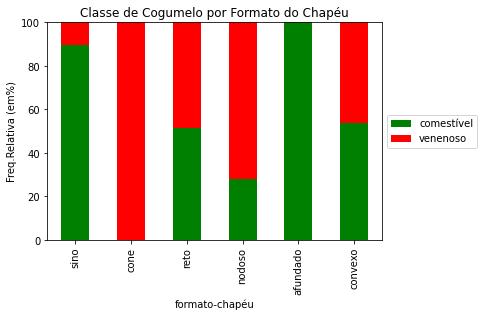

In [70]:
plot = (100*tabela_formato_chapéu).T.plot(kind='bar', stacked=True, color='green' 'red', title='Classe de Cogumelo por Formato do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

O formato do chapéu pode ser uma característica relevante na classificação de um cogumelo, especialmente quando o chapéu for em forma de sino e nodoso. Se o chapéu for convexo ou reto, essa característica não auxilia tanto na análise porque as probabilidades estão bem equilibradas. Os formatos cônico e afundado não são relevantes oara a classificação porque as porcentagens são 100 %, o que definiria a classificação com apenas uma pergunta. As probabilidades 100% não devem ser consideradas porque esse dataset não é a população inteira, é apenas uma amostra. Assim, se os exemplos do dataset cujo chapéu é de formato cônico são todos venenosos, isso não quer dizer que todos cogumelos cujo formato do chapéu é cônico existentes são venenosos. 

### Feature "Odor"

#### Tabela de Frequências Relativas

In [72]:
tabela_odor=pd.crosstab(train['classe'], train['odor'], normalize='columns')
tabela_odor*100

odor,amêndoa,creosote,podre,anis,mofado,nenhum,pungente,picante,peixe
classe,,,,,,,,,
comestível,100.0,0.0,0.0,100.0,0.0,96.85511,0.0,0.0,0.0
venenoso,0.0,100.0,100.0,0.0,100.0,3.14489,100.0,100.0,100.0


#### Gráfico de Empilhamento

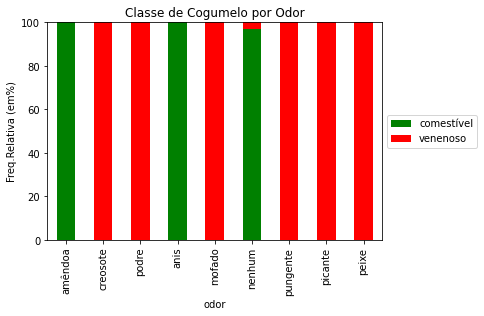

In [73]:
plot = (100*tabela_odor).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Odor')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

O odor do cogumelo é uma característica um pouco duvidosa para ser utilizada na classificação, visto que quase todas os odores são específicos de uma classe de cogumelos. O problema da probabilidade 100% foi explicada no item anterior. A única característica que pode ser bastante relevante para a análise é a do "odor nenhum".

### Feature "Superfície do Chapéu"

<img src=img/cap-surface.jpg width=40%>

#### Tabela de Frequências

In [74]:
tabela_superficie_chapeu=pd.crosstab(train['classe'], train['superfície-chapéu'], normalize='columns')
tabela_superficie_chapeu*100

superfície-chapéu,fibroso,ranhuras,liso,escamoso
classe,,,,
comestível,68.025258,0.0,45.263158,46.653061
venenoso,31.974742,100.0,54.736842,53.346939


#### Gráfico de Empilhamento

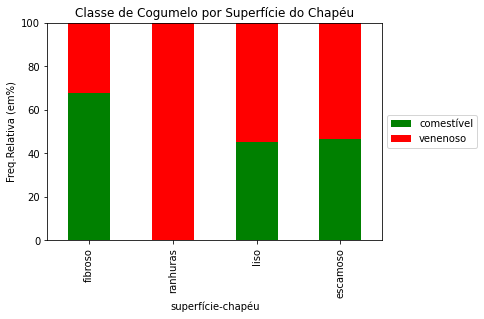

In [75]:
plot = (100*tabela_superficie_chapeu).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Superfície do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A superfície do chapéu somente não é relevante na classificação se o chapéu apresentar ranhuras, já que, nos dados observados, apenas cogumelos venenosos apresentam esse tipo de superfície (já explicado antes o problema da probabilidade 100%). As superfícies lisa e escamosa provavelmente não terão alto grau de relevância na classificação devido às probabilidades bem divididas entre as duas classes de cogumelo (venenoso e comestível), o que não permite uma tomada de decisão clara. 

### Feature "Cor do Chapéu"

<img src=img/cogumelo_cores.png width=40%>

#### Tabela de Frequências Relativas

In [76]:
tabela_cor_chapeu=pd.crosstab(train['classe'], train['cor-chapéu'], normalize='columns')
tabela_cor_chapeu*100

cor-chapéu,couro,canela,vermelho,cinza,marrom,rosa,verde,roxo,branco,amarelo
classe,,,,,,,,,,
comestível,25.619835,80.0,41.239892,56.200717,56.079116,37.614679,100.0,100.0,70.988447,38.095238
venenoso,74.380165,20.0,58.760108,43.799283,43.920884,62.385321,0.0,0.0,29.011553,61.904762


#### Gráfico de Empilhamento

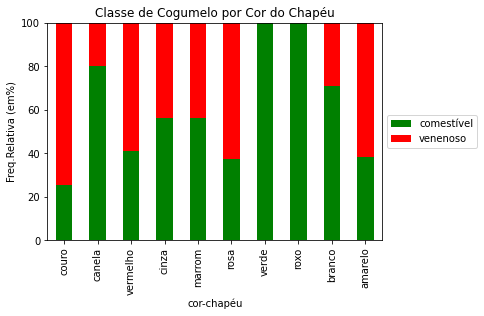

In [77]:
plot = (100*tabela_cor_chapeu).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor do Chapéu')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A cor do chapéu é popularmente considerada uma característica que define se um cogumelo é venenoso ou não. No entanto, de acordo com os dados do dataset, não são todas as cores que definem bem. Por exemplo o vermelho e o amarelo que são normalmente vistas como cores de advertência/perigo e por isso determinam o cogumelo como venenoso; porém, as observações aqui indicam que isso não é bem verdade. 

A cor do chapéu pode ser uma característica relevante na classificação, pois as probabilidades estão bem divididas entre as classes de cogumelos, com exceção das cores branco e roxo, que apresentam o problema da probabilidade 100%.

### Feature "Hematomas"

<img src=img/hematomas.jpg width=20%>

#### Tabela de Frequências Relativas

In [78]:
tabela_hematomas=pd.crosstab(train['classe'], train['hematomas'], normalize='columns')
tabela_hematomas*100

hematomas,não tem,tem
classe,,
comestível,31.302876,81.58618
venenoso,68.697124,18.41382


#### Gráfico de Empilhamento

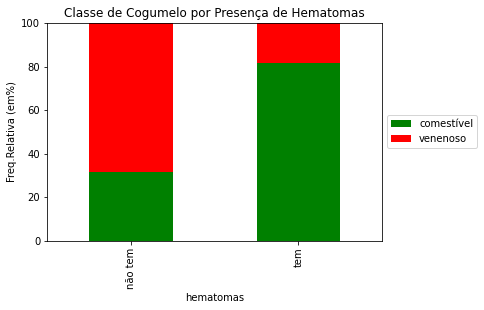

In [79]:
plot = (100*tabela_hematomas).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Presença de Hematomas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A presença de hematomas no cogumelo provavelmente é uma característica relevante para a análise, dado que, se um cogumelo possuir hematomas, a probabilidade observada de ele ser comestível é de 81,6 %, o que é relativamente alto, considerando que essa característica será analisada junto a outras.

### Feature "Ligação entre Lamelas"

#### Tabela de Frequências

In [80]:
tabela_ligacao_lamela=pd.crosstab(train['classe'], train['ligação-lamela'], normalize='columns')
tabela_ligacao_lamela*100

ligação-lamela,conectada,solta
classe,,
comestível,90.789474,51.338159
venenoso,9.210526,48.661841


#### Gráfico de Empilhamento

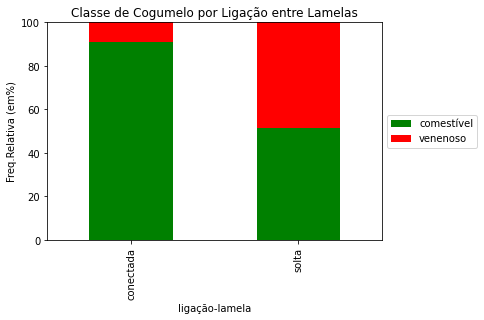

In [81]:
plot = (100*tabela_ligacao_lamela).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Ligação entre Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Se as lamelas forem conectadas, há 90,8% de probabilidade do cogumelo ser comestível. Logo, a ligação entre as lamelas pode ser uma característica interessante para a classificação se as lamelas forem conectadas. Porém, se forem soltas, essa característica não é tão relevante, devido às probabilidades divididias quase meio a meio entre as classes de cogumelo.

### Feature "Espaçamento-Lamela"

<img src=img/lamela_espacada.jpg width=40%>

In [82]:
tabela_espacamento_lamela=pd.crosstab(train['classe'], train['espaçamento-lamela'], normalize='columns')
tabela_espacamento_lamela*100

espaçamento-lamela,perto,lotado
classe,,
comestível,44.381027,92.193676
venenoso,55.618973,7.806324


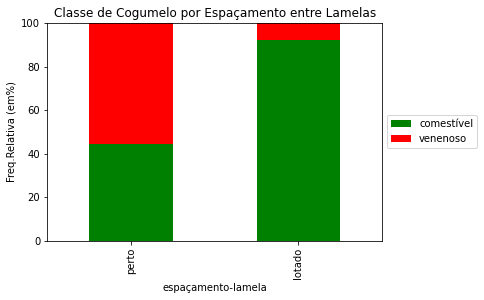

In [84]:
plot = (100*tabela_espacamento_lamela).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Espaçamento entre Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característica pode ser bem relevante se as lamelas forem abundantes/lotadas, pois, nesse caso, há uma probabilidade de 92% de o cogumelo ser comestível. Se as lamelas estiverem perto umas das outras, mas não lotadas, essa característica é menos relevante, pois as probabilidades estão divididas de modo bastante parecido entre as duas classes de cogumelo.

### Feature "Tamanho-Lamela"

<img src=img/lamelas.jpg width=20%>

#### Tabela de Frequência

In [85]:
tabela_tamanho_lamela=pd.crosstab(train['classe'], train['tamanho-lamela'], normalize='columns')
tabela_tamanho_lamela*100

tamanho-lamela,ampla,estreita
classe,,
comestível,70.135424,12.526539
venenoso,29.864576,87.473461


#### Gráfico de Empilhamento

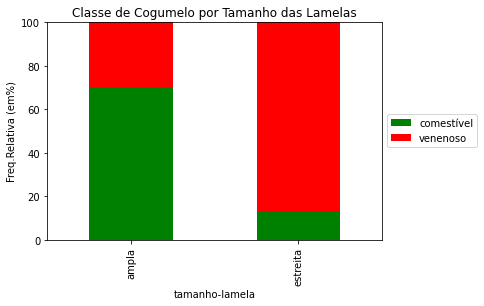

In [87]:
plot = (100*tabela_tamanho_lamela).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Tamanho das Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

O tamanho das lamelas, pela análise das probabilidades e do gráfico, provavelmente é uma característica relevante para a classificação, pois as probabilidades são bem diferentes quando as lamelas são estreitas e suficientemente diferentes quando as lamelas são amplas.

### Feature "Cor-Lamela"

<img src=img/lamela_colorida.jpg width=20%>

#### Tabela de Frequência

In [88]:
tabela_cor_lamela=pd.crosstab(train['classe'], train['cor-lamela'], normalize='columns')
tabela_cor_lamela*100

cor-lamela,couro,vermelha,cinza,chocolate,preta,marrom,laranja,rosa,verde,roxa,branca,amarelo
classe,,,,,,,,,,,,
comestível,0.0,100.0,32.675045,28.597786,84.161491,89.367089,100.0,57.425743,0.0,90.05102,79.646018,73.4375
venenoso,100.0,0.0,67.324955,71.402214,15.838509,10.632911,0.0,42.574257,100.0,9.94898,20.353982,26.5625


#### Gráfico de Empilhamento

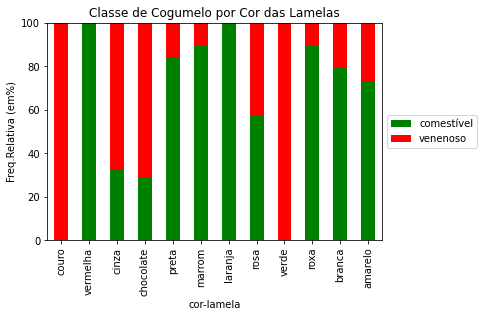

In [89]:
plot = (100*tabela_cor_lamela).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor das Lamelas')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A cor das lamelas é uma característica bastante relevante para classificar o cogumelo. De acordo com a tabela cruzada, a maioria das cores possuem probabilidades distribuídas de modo desigual entre as classes. Há a exceção das cores couro e vermelha, que apresentam o problema do 100%.

### Feature "Formato-Estipe"

<img src=img/formato_estipe.jpg width=30%>

#### Tabela de Frequências Relativas

In [90]:
tabela_formato_estipe=pd.crosstab(train['classe'], train['formato-estipe'], normalize='columns')
tabela_formato_estipe*100

formato-estipe,alargando,afunilando
classe,,
comestível,46.08067,57.056277
venenoso,53.91933,42.943723


#### Gráfico de Empilhamento

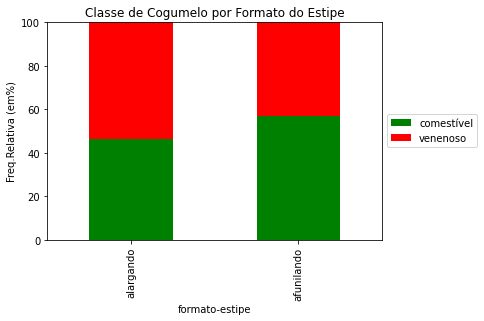

In [92]:
plot = (100*tabela_formato_estipe).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Formato do Estipe')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característica provavelmente é pouco relevante para a classificação, visto que, por meio das probabilidades e do gráfico, não há uma relação clara entre formato do estipe e comestibilidade do cogumelo. No entanto, ela ainda pode servir para separar alguns cogumelos em alguma parte do processo de classificação.

### Feature "Raiz-Estipe"

<img src=img/hifas.jpg width=40%>

#### Tabela de Frequências Relativas

In [93]:
tabela_raiz_estipe=pd.crosstab(train['classe'], train['raiz-estipe'], normalize='columns')
tabela_raiz_estipe*100

raiz-estipe,não tem,bulboso,clava,reto,enraizado
classe,,,,,
comestível,29.395754,51.822004,91.990291,76.498237,100.0
venenoso,70.604246,48.177996,8.009709,23.501763,0.0


#### Gráfico de Empilhamento

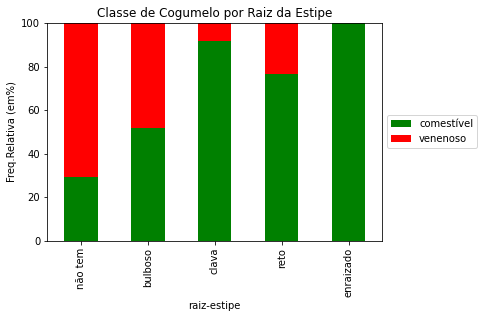

In [94]:
plot = (100*tabela_raiz_estipe).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Raiz da Estipe')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

O formato da raiz da estipe é uma característica relevante, dado que as probabilidades são bastante desiguais para a maioria dos tipos de raiz de estipe, come exceção da bulbosa. A característica "enraizado" provavelmente não é tão relevante pois apresenta o problema da probabilidade 100%.

### Feature "Superfície Estipe Sobre Anel"

<img src=img/sobre_anel.jpg width=40%>

#### Tabela de Frequências Relativas

In [95]:
tabela_sueperficie_estipe_sobre_anel=pd.crosstab(train['classe'], train['superfície-estipe-sobre-anel'], normalize='columns')
tabela_sueperficie_estipe_sobre_anel*100

superfície-estipe-sobre-anel,fibroso,sedoso,liso,escamoso
classe,,,,
comestível,75.18797,6.38779,70.719222,66.666667
venenoso,24.81203,93.61221,29.280778,33.333333


#### Gráfico de Empilhamento

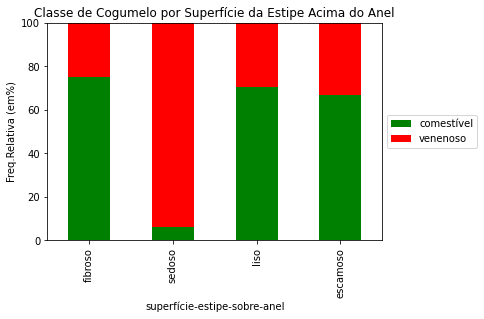

In [96]:
plot = (100*tabela_sueperficie_estipe_sobre_anel).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Superfície da Estipe Acima do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característica provavelmente é bastante relevante para a classificação, dado que, de acordo com a tabela cruzada e o gráfico de empilhamento, as probabilidades para cada tipo de superfície são suficientemente desiguais entre as duas classes de cogumelo.

### Feature "Superfície Estipe Sob Anel"

<img src=img/sob_anel.jpg width=40%>

#### Tabela de Frequências Relativas

In [97]:
tabela_sueperficie_estipe_sob_anel=pd.crosstab(train['classe'], train['superfície-estipe-sob-anel'], normalize='columns')
tabela_sueperficie_estipe_sob_anel*100

superfície-estipe-sob-anel,fibroso,sedoso,liso,escamoso
classe,,,,
comestível,77.097506,6.795548,69.029152,73.300971
venenoso,22.902494,93.204452,30.970848,26.699029


#### Gráfico de Empilhamento

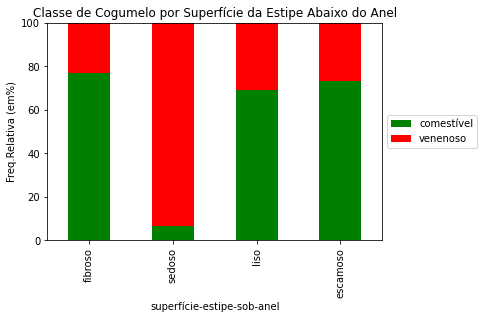

In [98]:
plot = (100*tabela_sueperficie_estipe_sob_anel).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Superfície da Estipe Abaixo do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A relevância dessa característica é semelhante à da anterior.

### Feature "Cor Estipe Sobre Anel"

#### Tabela de Frequências Relativas

In [99]:
tabela_cor_estipe_sobre_anel=pd.crosstab(train['classe'], train['cor-estipe-sobre-anel'], normalize='columns')
tabela_cor_estipe_sobre_anel*100

cor-estipe-sobre-anel,couro,canela,vermelho,cinza,marrom,laranja,rosa,branco,amarelo
classe,,,,,,,,,
comestível,0.0,0.0,100.0,100.0,3.571429,100.0,31.537356,62.352246,0.0
venenoso,100.0,100.0,0.0,0.0,96.428571,0.0,68.462644,37.647754,100.0


#### Gráfico de Empilhamento

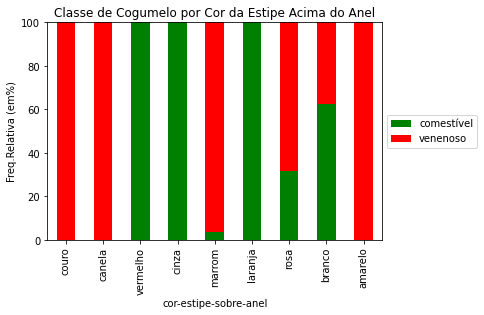

In [100]:
plot = (100*tabela_cor_estipe_sobre_anel).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor da Estipe Acima do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A cor da estipe acima do anel é uma característica pouco relevante para a classificação, devido a diversas cores apresentarem o problema da probabilidade 100%. As exceções são as cores branco, rosa e marrom.

### Feature "Cor Estipe Sob Anel"

#### Tabela de Frequências Relativas

In [101]:
tabela_cor_estipe_sob_anel=pd.crosstab(train['classe'], train['cor-estipe-sob-anel'], normalize='columns')
tabela_cor_estipe_sob_anel*100

cor-estipe-sob-anel,couro,canela,vermelho,cinza,marrom,laranja,rosa,branco,amarelo
classe,,,,,,,,,
comestível,0.0,0.0,100.0,100.0,14.322917,100.0,30.606282,62.180835,0.0
venenoso,100.0,100.0,0.0,0.0,85.677083,0.0,69.393718,37.819165,100.0


#### Gráfico de Empilhamento

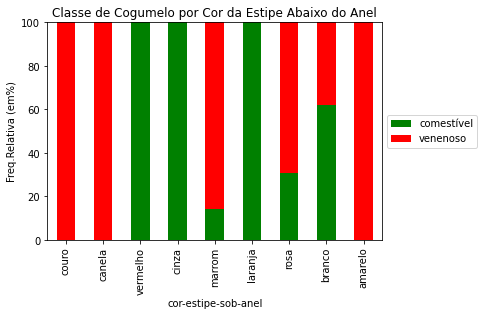

In [102]:
plot = (100*tabela_cor_estipe_sob_anel).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor da Estipe Abaixo do Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A relevância dessa característica é semelhante à da anterior.

### Feature "Tipo-Volva"

#### Tabela de Frequências Relativas

In [103]:
tabela_tipo_volva=pd.crosstab(train['classe'], train['tipo-volva'], normalize='columns')
tabela_tipo_volva*100

tipo-volva,parcial
classe,
comestível,52.322337
venenoso,47.677663


#### Gráfico de Empilhamento

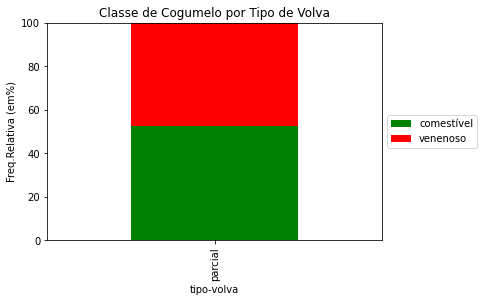

In [104]:
plot = (100*tabela_tipo_volva).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Tipo de Volva')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característca não é relevante para a classificação, visto que há apenas um tipo de volva na base de dados e ela não permite concluir com segurança a comestibilidade de um cogumelo.

### Feature "Cor-Volva"

#### Tabela de Frequências Relativas

In [105]:
tabela_cor_volva=pd.crosstab(train['classe'], train['cor-volva'], normalize='columns')
tabela_cor_volva*100

cor-volva,marrom,laranja,branco,amarelo
classe,,,,
comestível,100.0,100.0,51.269121,0.0
venenoso,0.0,0.0,48.730879,100.0


#### Gráfico de Empilhamento

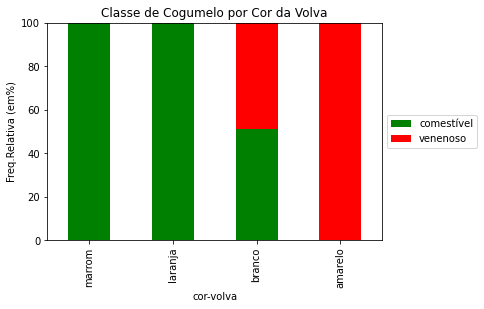

In [106]:
plot = (100*tabela_cor_volva).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor da Volva')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A cor da volva é relevante para a classificação de um cogumelo se a cor for branca. Se a cor for marrom, laranja ou amarela, há o problema da probabilidade 100%.

### Feature "Quantidade de Anéis"

#### Tabela de Frequências Relativas

In [107]:
tabela_quantidade_aneis=pd.crosstab(train['classe'], train['quantidade-anéis'], normalize='columns')
tabela_quantidade_aneis*100

quantidade-anéis,nenhum,um,dois
classe,,,
comestível,0.0,49.652468,88.351648
venenoso,100.0,50.347532,11.648352


#### Gráfico de Empilhamento

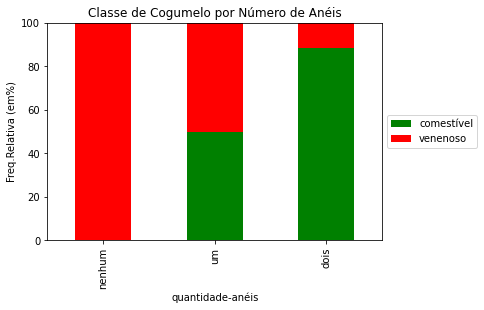

In [109]:
plot = (100*tabela_quantidade_aneis).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Número de Anéis')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Quando um cogumelo não possuir anéis, essa característica (quantidade de anéis) é irrelevante devido ao problema da probabilidade 100%. Se o cogumelo possuir um anel, provavelmente isso não é relevante porque as probabilidades estão divididas quase 50 - 50 entre as duas classes de cogumelo.

### Feature "Tipo de Anel"

<img src=img/anel_diferente.jpg width=40%>

#### Tabela de Frequências Relativas

In [110]:
tabela_tipo_anel=pd.crosstab(train['classe'], train['tipo-anel'], normalize='columns')
tabela_tipo_anel*100

tipo-anel,evanescente,deslumbrante,grande,nenhum,pingente
classe,,,,,
comestível,36.747573,100.0,0.0,0.0,79.667221
venenoso,63.252427,0.0,100.0,100.0,20.332779


#### Gráfico de Empilhamento

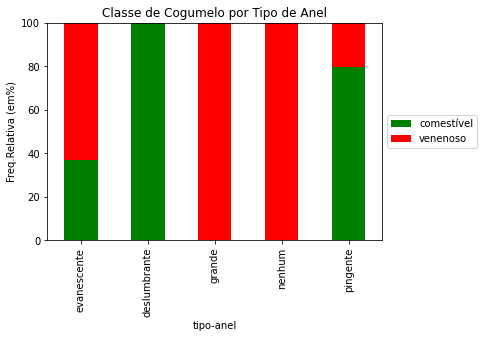

In [111]:
plot = (100*tabela_tipo_anel).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Tipo de Anel')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característica é relevante para a classificação, pois as probabilidades observadas são bem desiguais para cada tipo de anel. O único tipo de anel que não oferece uma boa segurança na tomada de decisão é o evanescente.

### Feature "Cor da Impressão de Esporo"

#### Tabela de Frequências Relativas

In [112]:
tabela_cor_impressao_esporo=pd.crosstab(train['classe'], train['cor-impressão-esporo'], normalize='columns')
tabela_cor_impressao_esporo*100

cor-impressão-esporo,couro,chocolate,preto,marrom,laranja,verde,roxo,branco,amarelo
classe,,,,,,,,,
comestível,100.0,3.047776,87.951807,88.47185,100.0,0.0,100.0,25.028121,100.0
venenoso,0.0,96.952224,12.048193,11.52815,0.0,100.0,0.0,74.971879,0.0


#### Gráfico de Empilhamento

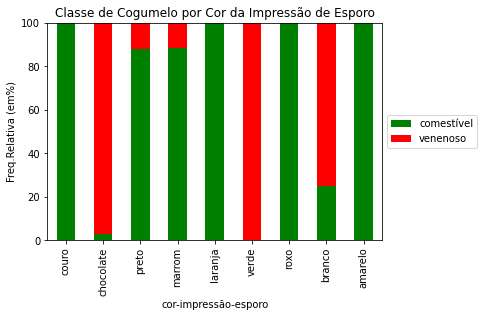

In [113]:
plot = (100*tabela_cor_impressao_esporo).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Cor da Impressão de Esporo')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

A cor da impressão de esporo é uma característica relevante para a classificação de um cogumelo, pois, de acordo com a tabela cruzada e o gráfico, as probabilidades estão bem desiguais para cada cor.

### Feature "População"

<img src=img/cogumelo_populacao.jpg width=40%>

#### Tabela de Frequências Relativas

In [114]:
tabela_populacao=pd.crosstab(train['classe'], train['população'], normalize='columns')
tabela_populacao*100

população,abundante,aglomerado,numeroso,espalhado,diverso,solitário
classe,,,,,,
comestível,100.0,84.810127,100.0,69.935345,30.971129,61.971831
venenoso,0.0,15.189873,0.0,30.064655,69.028871,38.028169


#### Gráfico de Empilhamento

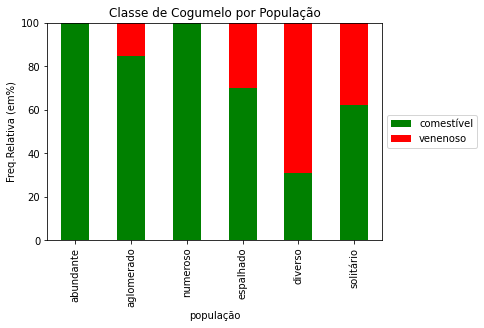

In [115]:
plot = (100*tabela_populacao).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por População')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

Essa característica ecológica, além de ser mais fácil de observar na natureza, aparenta ser relevante para a classificação. No entanto, se o tipo da população do cogumelo for espalhada, diversa ou solitária, não se pode afirmar com muita segurança sobre a comestibilidade do cogumelo.

### Feature "Habitat"

#### Tabela de Frequências Relativas

In [116]:
tabela_habitat=pd.crosstab(train['classe'], train['habitat'], normalize='columns')
tabela_habitat*100

habitat,madeira,gramínea,folha,pradaria,trilha,urbano,lixo
classe,,,,,,,
comestível,60.801688,65.292308,29.623568,88.288288,11.695906,26.642336,100.0
venenoso,39.198312,34.707692,70.376432,11.711712,88.304094,73.357664,0.0


#### Gráfico de Empilhamento

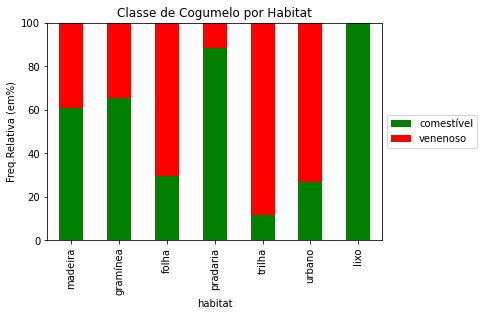

In [117]:
plot = (100*tabela_habitat).T.plot(kind='bar', stacked=True,color='green' 'red',title='Classe de Cogumelo por Habitat')
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### Comentários

O habitat do cogumelo pode ser um bom indicador de sua classe, dado que a maior parte dos habitats apresentam probabilidades bem desiguais entre as duas classes. Os habitats "madeira" e "gramínea" provavelmente são menos eficazes da determinação da comestibilidade de um cogumelo, dado que as probabilidades entre as duas classes possuem uma menor divergência.

## Resumo

A análise exploratória permite perceber que algumas features provavelmente não serão relevantes para a classificação, enquanto outras sim. Isso pode ser interessante para compreender possíveis causalidades biológicas entre características morfológicas/ecológicas e a toxicidade de um cogumelos.

## Referências

Artigos sobre a importância de classificar cogumelos para o avanço de estudos epidemiológicos.

Artigos utilizados para contextualizar o projeto:

- https://journals.lww.com/ccmjournal/Fulltext/2005/02000/Evolving_global_epidemiology,_syndromic.20.aspx?casa_token=S8wpW-UV9YQAAAAA:euwbpD0rKCztYeKlI9rQ7js_X27GAaFBHdy27hRCkE3G2P12k068dV6rtpkWoDDHzN_uEY-1L5cJsR8Xg_1ZbCrrrFQKokQh

- https://www.sciencedirect.com/science/article/pii/S0041010118307281?casa_token=XYjPj28rgNoAAAAA:BmRc1OwZ-DLQw56YwCwMasmcWK6YaLeJ8GcztbnhAY8w04vwArOW77fAcpu8dGoaBvE7njI1Xdo

Arquivo do GitHub utilizado para entender como gerar gráficos de empilhamento:

- https://github.com/Insper/cd19/blob/master/aula01_tutorial/TUTORIAL.ipynb

Documentação sobre remoção de linhas com valores vazios:
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html